# Summary Notebook

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import geopandas as gpd

## 1. Data

### 1.1 Data used

The data sourcing  process consist of web scraping, geospatial data collection, proximity calculation, and external feature scraping.
- Property
The property data is from Oldlistings:
    - Rental: 29,282 HTML files -> 3,475,870 records
    - Buy/Sell: 39,731 HTML files -> 1,870,481 records

- Proximity
Using OpenRouteService (ORS), we calculated driving travel times from each property to the nearest:
    - City centres
    - Stops & stations
    - Parks & reserves
OpenStreetMap was used to run the ORS server locally

- Digital Boundaries
Downloaded shapefiles for geospatial visualisations and spatial joins. Sources: ABS, data.vic, covering:
    - Statistical Areas 2 (SA2)
    - Suburbs and Localities (SAL)
    - Postcodes
    - School Zones

- External Features
Additional data sources were used to enrich the property dataset, sourced from ABS, Reserve Bank of Australia (RBA), and CSA. These external features include:
    - SA2 population
    - SA2 median income
    - Yearly inflation rate
    - Yearly unemployment rate
    - Yearly housing interest rate
    - Postcode crime rate

### 1.2 Data Preprocessing

- Preprocess the rental and buy/sell data separately
    - Remove missing data and NULL
    - Remove irregular character. (e.g. "Α" and "A", the first one is uppercase of Greek letter "α", aka 'alpha')
    - Remove unwanted feature(s). (e.g. extreme high or low price)
- Then aggregate both internal and external features to a single dataframe 

The final data is:

In [5]:
pd.read_csv("../data/curated/rental-17-24.csv").head(10).to_csv("../SummaryNotebookRelated/rental-17-24-sample.csv", index=False)
df = pd.read_csv("../SummaryNotebookRelated/rental-17-24-sample.csv")
df

address     suburb  bed  bath  car       type  \
0   201/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   2.0  1.0  Unit/apmt   
1   201/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   2.0  1.0  Unit/apmt   
2   201/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   2.0  1.0  Unit/apmt   
3  1702/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   1.0  0.0  Unit/apmt   
4  1702/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   1.0  0.0  Unit/apmt   
5  1702/560 LONSDALE STREET, MELBOURNE  MELBOURNE  2.0   1.0  0.0  Unit/apmt   
6  2007/228 ABECKETT STREET, MELBOURNE  MELBOURNE  2.0   2.0  0.0  Unit/apmt   
7  2007/228 ABECKETT STREET, MELBOURNE  MELBOURNE  2.0   2.0  0.0  Unit/apmt   
8  2007/228 ABECKETT STREET, MELBOURNE  MELBOURNE  2.0   2.0  0.0  Unit/apmt   
9  2007/228 ABECKETT STREET, MELBOURNE  MELBOURNE  2.0   2.0  0.0  Unit/apmt   

   year     sa2_code  median_income  population  cpi  unemployment_rate  \
0  2023  206041505.0   44492.400500     20027.0  5.6           3.691667   
1  2023  206041505.0   44492.400500     20027.0  5.6           3.691667   
2  2021  206041505.0   39300.000000     16098.0  3.5           4.200000   
3  2023  206041505.0   44492.400500     20027.0  5.6           3.691667   
4  2023  206041505.0   44492.400500     20027.0  5.6           3.691667   
5  2023  206041505.0   44492.400500     20027.0  5.6           3.691667   
6  2023  206041504.0   39250.645733     21566.0  5.6           3.691667   
7  2023  206041504.0   39250.645733     21566.0  5.6           3.691667   
8  2022  206041504.0   44634.000326     18876.0  7.8           3.611111   
9  2022  206041504.0   44634.000326     18876.0  7.8           3.611111   

        lat        lng                           geometry  rented_price  \
0 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           800   
1 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           800   
2 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           540   
3 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           720   
4 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           650   
5 -37.81373  144.95558  POINT (144.95558001 -37.81373001)           720   
6 -37.81028  144.95667  POINT (144.95667001 -37.81028001)           830   
7 -37.81028  144.95667  POINT (144.95667001 -37.81028001)           830   
8 -37.81028  144.95667  POINT (144.95667001 -37.81028001)           650   
9 -37.81028  144.95667  POINT (144.95667001 -37.81028001)           650   

   city_index  time_city  avg_property_price  
0           0      263.3       682488.770000  
1           0      263.3       682488.770000  
2           0      263.3       619543.745192  
3           0      263.3       682488.770000  
4           0      263.3       682488.770000  
5           0      263.3       682488.770000  
6           0      210.9       682488.770000  
7           0      210.9       682488.770000  
8           0      210.9       642573.012766  
9           0      210.9       642573.012766

## 2. Analysis

### 2.1 Most Important Internal and External Features

This correlation matrix contains:
- Internal feature
    - Year listed (year)
    - Number of bedrooms (bed)
    - Number of bathrooms (bath)
    - Number of car parking spaces (car)

- External feature
    - SA2-level median income (median_income)
    - SA2-level population (population)
    - Annual inflation rate (cpi)
    - Annual unemployment rate (unemployment_rate)
    - Travel time to the nearest city centre (time_city)
    - Suburb-level average property sell price (avg_property_price)

- Label
    - Rental price (rented_price)

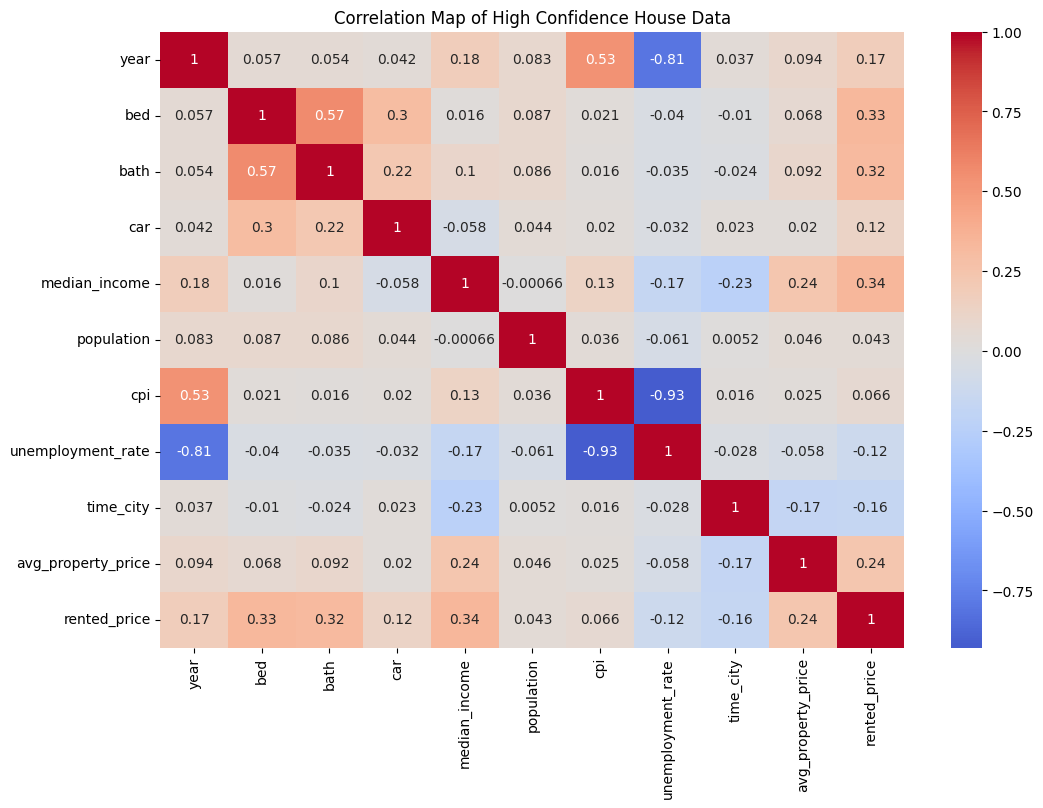

In [6]:
# correlation matrix plot
correlation_matrix = Image.open("../plots/Correlation_matrix.png")
correlation_matrix

From the correlation matrix plot
- The most important internal feature(s):
    - Number of bedrooms (bed)
    - Number of bathrooms (bath)

- The most important external feature(s):
    - SA2-level median income (median_income)
    - Suburb-level average property sell price (avg_property_price)

Removed feature
  - Travel time to the nearest PTV stop/station (time_ptv)
  - Annual housing interest (housing_interest)
  - School Zone Status (is_in_school_zone)

Why remove those features?
- Travel time to the nearest PTV stop/station (time_ptv):
  * This feature was removed due to its weak correlation with rented_price.
- Annual housing interest (housing_interest): 
  * This feature was removed due to the historic data can't be found.
- School Zone Status (is_in_school_zone): 
  * This feature was removed because all properties in the dataset are located within school zones, resulting in no variation. Since this feature does not offer discriminatory information across the dataset, it does not contribute to explaining variations in rental prices.

## 3. Model

## 4. Results

### 4.1 Top 10 Suburb Growth Rate

#### House

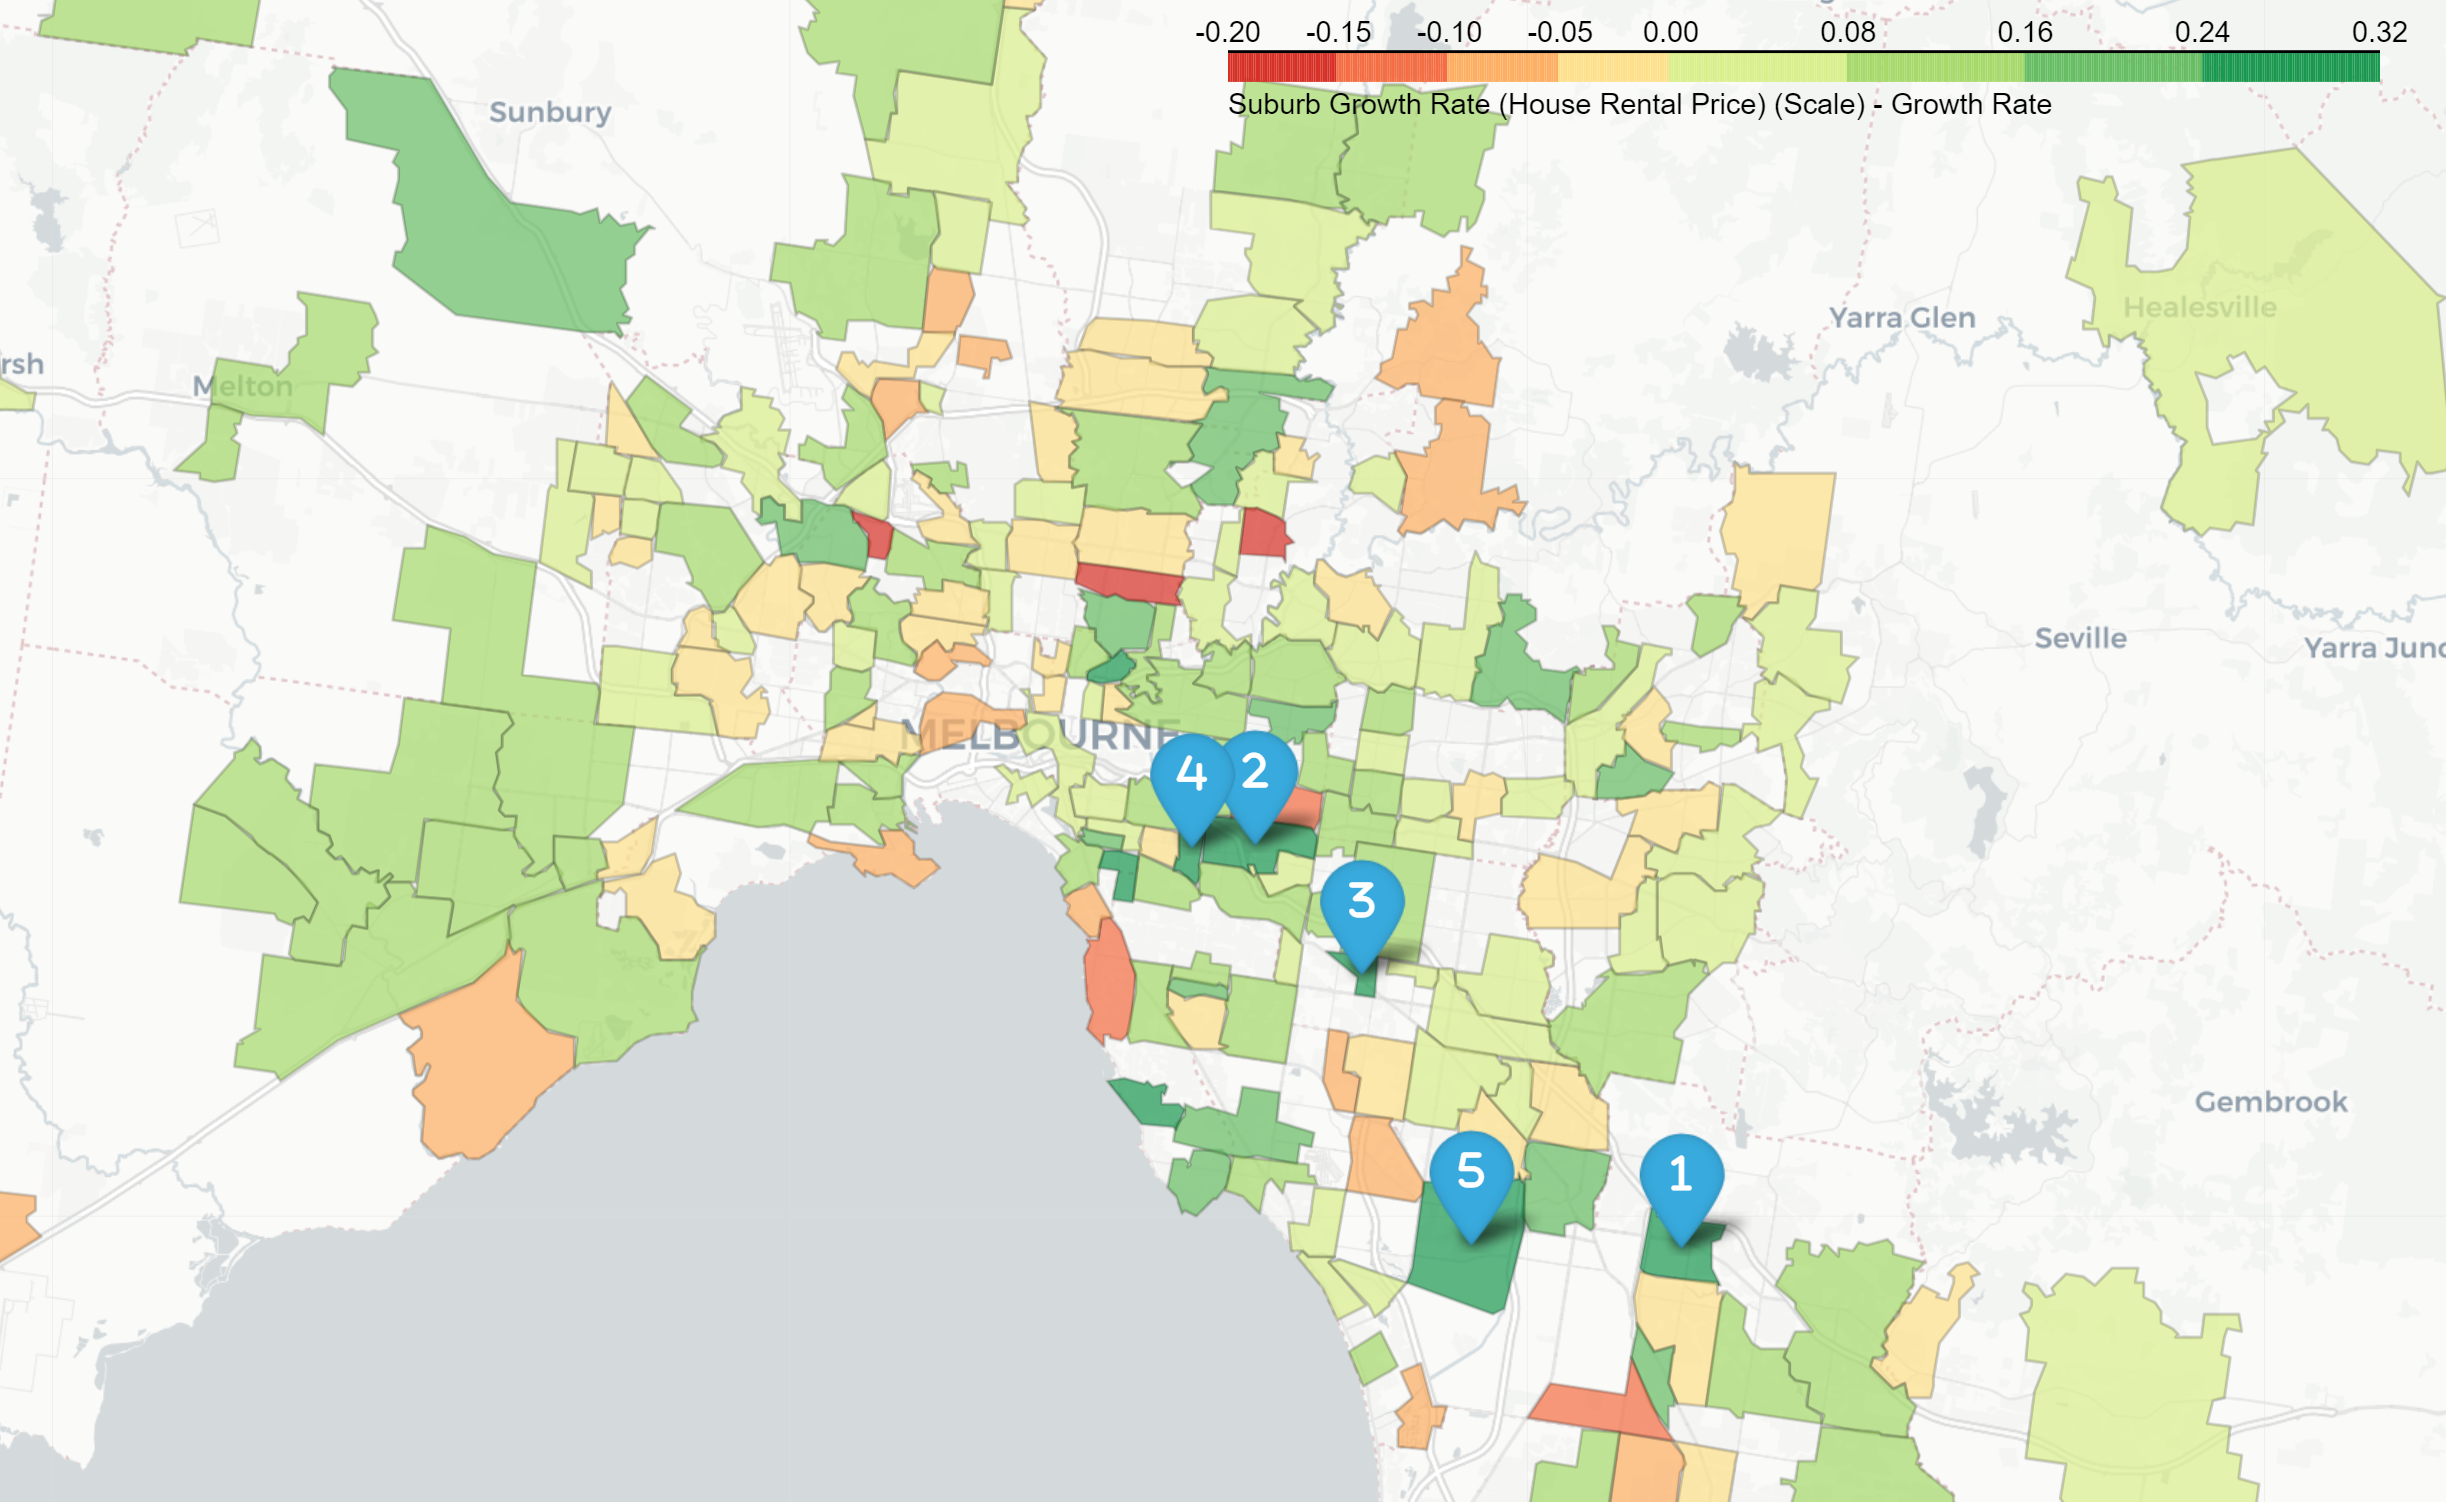

In [8]:
house_growth = Image.open("../plots/House.png")
house_growth

#### Unit/apartment

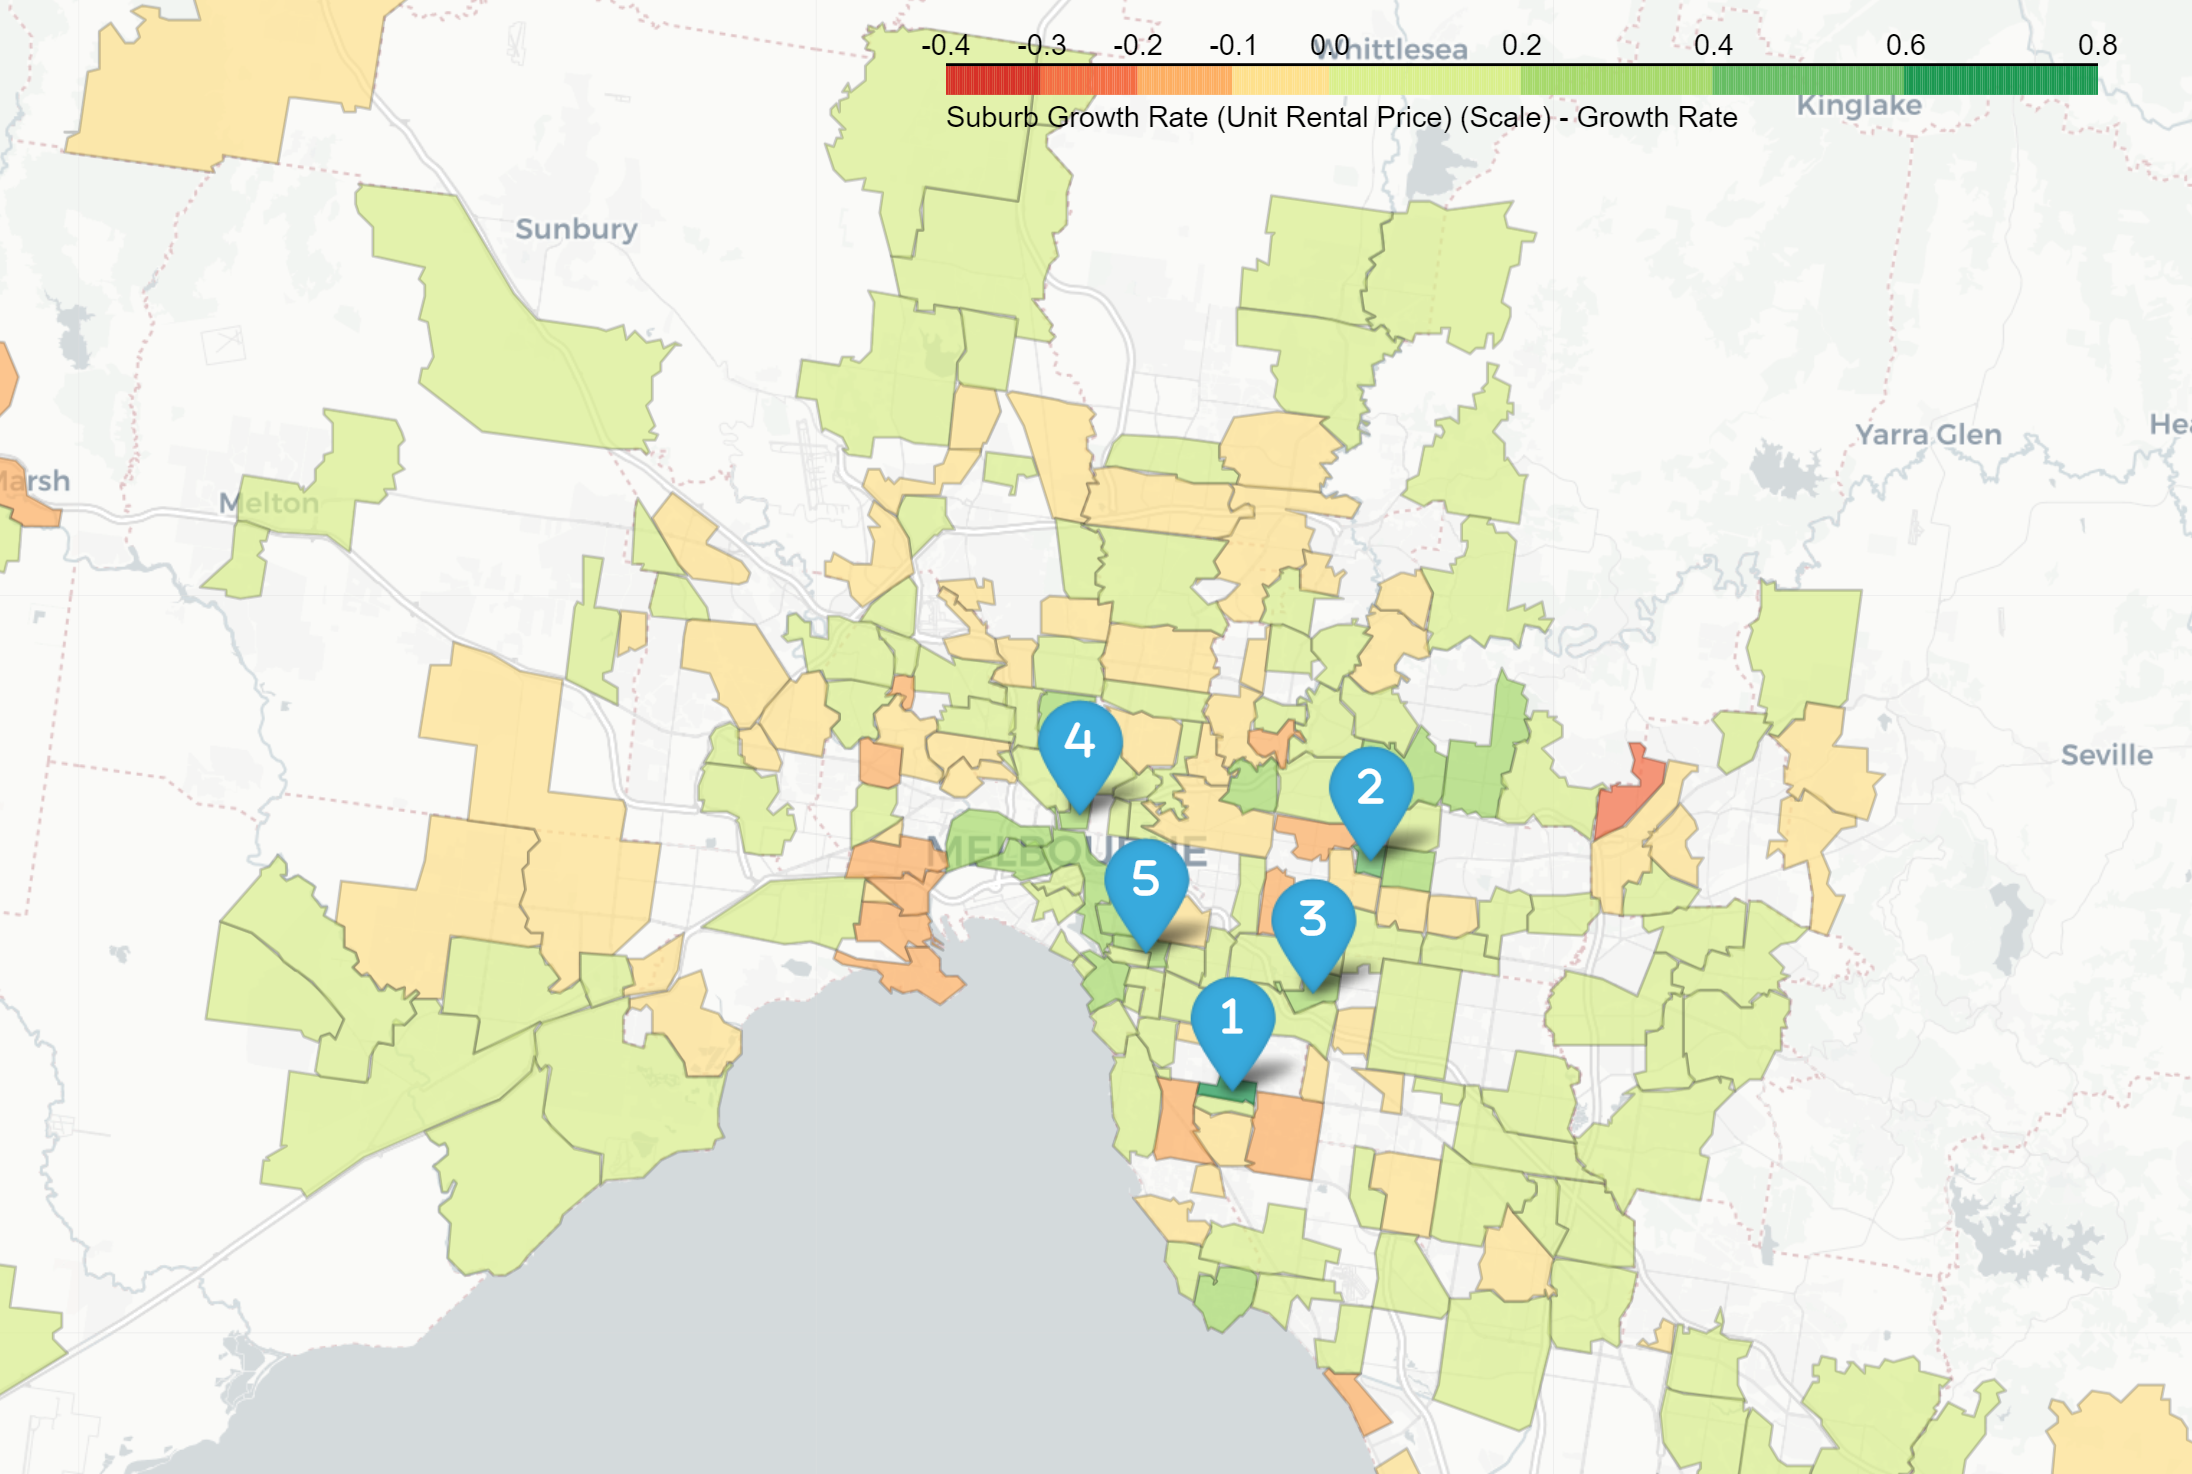

In [9]:
unit_growth = Image.open("../plots/Unit.png")
unit_growth

### 4.2 Affordability

The formula used to calculate the affordability can be expressed as the ratio of housing costs to gross household income (ABS 2022a).

In [17]:
affordability = pd.read_csv("../data/curated/affordability_rank.csv")
affordability

postcode  rank
0        3000     1
1        3939     2
2        3944     3
3        3943     4
4        3929     5
..        ...   ...
334      3480   335
335      3414   336
336      3304   337
337      3390   338
338      3318   339

[339 rows x 2 columns]

In [20]:
print('The most affordable suburb is', affordability['postcode'][0])

The most affordable suburb is 3000


### 4.3 Livability

Liveability score is defined to be the weighted average of below features

1. Housing affordability
2. Travel time to nearest
    - Public transport
    - City centres
    - Park/Reserve
3. Crime Rate

#### 4.3.1 To public transport

In [21]:
ptv_rank = pd.read_csv("../data/curated/ptv_rank.csv")
ptv_rank

postcode  rank
0        3000     1
1        3003     2
2        3055     3
3        3008     4
4        3053     5
..        ...   ...
334      3664   335
335      3939   336
336      3723   337
337      3401   338
338      3956   339

[339 rows x 2 columns]

#### 4.3.2 Proximity to City centres

In [22]:
city_rank = pd.read_csv("../data/curated/city_rank.csv")
city_rank

postcode  rank
0        3220     1
1        3000     2
2        3053     3
3        3350     4
4        3006     5
..        ...   ...
334      3498   335
335      3888   336
336      3500   337
337      3501   338
338      3505   339

[339 rows x 2 columns]

#### 4.3.3 Proximity to Parks

In [23]:
park_rank = pd.read_csv("../data/curated/park_rank.csv")
park_rank

postcode  rank
0        3975     1
1        3980     2
2        3976     3
3        3177     4
4        3806     5
..        ...   ...
334      3318   335
335      3498   336
336      3500   337
337      3501   338
338      3505   339

[339 rows x 2 columns]

#### 4.3.4 Crime Rate

In [24]:
crime_rank = pd.read_csv("../data/curated/crime_rank.csv")
crime_rank

postcode  rank
0        3270     1
1        3929     2
2        3749     3
3        3927     4
4        3687     5
..        ...   ...
334      3551   335
335      3352   336
336      3977   337
337      3550   338
338      3350   339

[339 rows x 2 columns]

Livability

In [27]:
livability = pd.read_csv("../data/curated/livability_final.csv")
livability

postcode  rank_ptv  rank_crime  rank_city  rank_park  liveability_rank  \
0        3053         5         133          3        116         65.833333   
1        3151       101          72        121         42         84.833333   
2        3104        91          82         65         81         82.000000   
3        3000         1         235          2        107         96.833333   
4        3109        87         110        105         70         94.833333   
..        ...       ...         ...        ...        ...               ...   
334      3505       221         212        339        339        257.333333   
335      3636       319         152        292        297        255.166667   
336      3860       323         205        315        272        273.833333   
337      3579       293         232        264        310        270.666667   
338      3825       254         332        273        213        276.333333   

     rank_affordability  final_rank  
0                    13   39.416667  
1                     8   46.416667  
2                    15   48.500000  
3                     1   48.916667  
4                     6   50.416667  
..                  ...         ...  
334                 325  291.166667  
335                 331  293.083333  
336                 318  295.916667  
337                 324  297.333333  
338                 332  304.166667  

[339 rows x 8 columns]

## 5. Limitation & Future Scope

- Limitation:
    - Data Quality: The available data was of poor quality, affecting the accuracy of findings.
    - Limited Data: Restrictions from web scraping permissions and the exclusion of pre-COVID data severely limited the dataset size.
    - Internal Features: Not enough internal features were available, restricting deeper analysis.
    - Over-Aggregation: Critical information was abstracted due to the over-aggregation of data, leading to a loss of detail.
    - Working Capacity: The team's working capacity was constrained, affecting the delivery of the MVP (Minimum Viable Product).

- Future Scope:
    - Access to Additional Features: Expanding access to relevant internal features, such as property land size, will provide more granular insights.
    - Higher-Quality Data: Using a CoreLogic Pro package will ensure access to higher-quality real estate data.
    - Complete Datasets: Avoiding over-aggregation by obtaining more complete datasets will allow for more nuanced analysis.
    - Increased Team Capacity: Increasing the team’s working capacity to approximately 56 hours per week over a 30-week period will provide the time required for deeper analysis and feature development.
    - Onboarding SME Resources: Bringing on board subject matter experts (SMEs) in real estate will provide valuable insights and guidance for refining the project.